In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import pickle
import lightgbm as lgb

from tqdm import tqdm_notebook

import os
import time
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import librosa  # MFCC feature
from multiprocessing import Pool

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
os.listdir('./data/features/')

[]

In [2]:
!ls ./data/prediction/

0425_2216_LGBModel_2_CV_2.07_0.83
0425_2231_LGBModel_1_CV_4.15_1.87
0425_2245_LGBModel_1_CV_1.96_0.84
0425_2324_XGBModel_3_CV_1.45_0.85
0425_2329_LGBModel_3_CV_1.95_0.83
0425_2339_CatModel_3_CV_1.48_0.84
0425_2343_SklearnModel_3_CV_2.26_0.82
0426_1826_NuSVR_3_CV_2.26_0.82
0426_1830_SVR_3_CV_2.35_0.84
0426_1843_RandomForest_3_CV_2.20_0.79
0426_2011_LGBModel_3_CV_1.95_0.83
0426_2017_LGBModel_4_CV_1.92_0.80
0426_2019_LGBModel_4_CV_1.92_0.80
0426_2028_LGBModel_4_CV_1.92_0.79
0426_2043_LGBModel_5_CV_1.92_0.78
0426_2044_LGBModel_5_CV_1.92_0.78
0426_2045_LGBModel_6_CV_1.88_0.77
0426_2048_LGBModel_7_CV_1.93_0.76
0427_1552_LGBModel_8_CV_1.88_0.77
0427_1637_LGBModel_9_CV_1.96_0.84
0427_1751_LGBModel_10_CV_1.96_0.82
0427_1753_LGBModel_11_CV_1.92_0.81
0427_1754_LGBModel_12_CV_1.91_0.80
0427_1754_LGBModel_13_CV_1.88_0.77
0427_1754_LGBModel_14_CV_1.87_0.75
0427_1754_LGBModel_15_CV_1.89_0.74
0427_1755_LGBModel_16_CV_1.91_0.75
0427_1755_LGBModel_17_CV_1.99_0.83
0427_1755_LGBModel_18_CV_3.05_0.87
0428_

In [5]:
pred = pickle.load(open('./data/prediction/0504_1217_LGBModel_74_CV_1.97_1.89_0.73', 'rb'))

In [14]:
np.max(pred['oof'])

16.32181958647342

In [9]:
X_tr, y_tr = pickle.load(open('./data/transform.p', 'rb'))

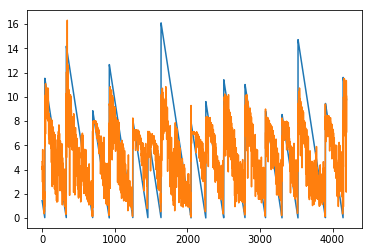

In [12]:
plt.plot(y_tr)
plt.plot(pred['oof'])

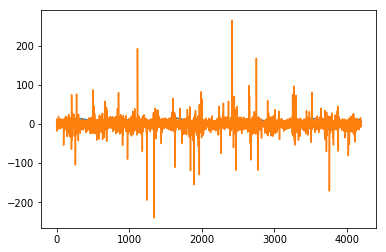

In [16]:
plt.plot(y_tr)
plt.plot(X_tr.iloc[:, 1])
